# Classification experiment of single (cutted) cells - 5 HPF dataset version

In [9]:
%reload_ext autoreload
%autoreload 2
from fastai import *
from fastai.vision import *
path = Path('./')

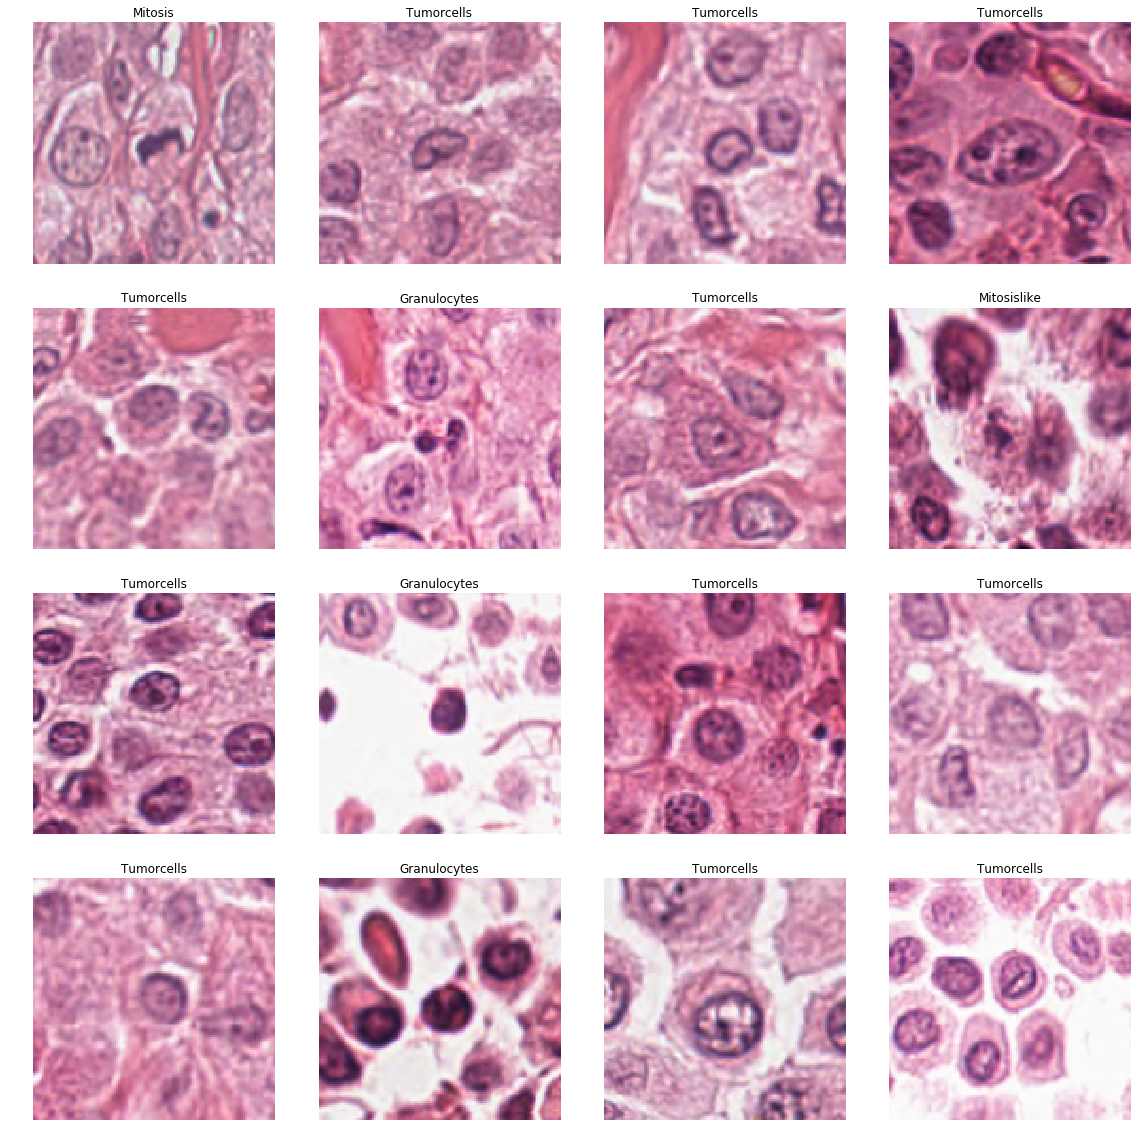

In [10]:
bs=16
data = ImageDataBunch.from_folder(Path('./Data5HPF'),
        ds_tfms=get_transforms(), valid_pct=0.2, size=128, train='train', num_workers=4, bs=bs, test="test").normalize()

data.show_batch(rows=4)

In [11]:
data_test = (ImageList.from_folder(Path('./Data5HPF/'))
        .split_by_folder(train='train', valid='test')
        .label_from_folder()).databunch().normalize()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


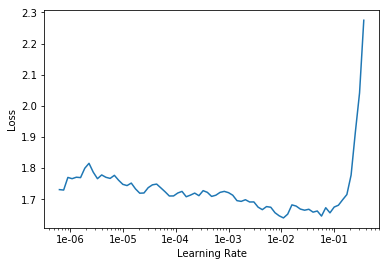

In [12]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, callback_fns=[ShowGraph])
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.821690,0.600154,0.770270,00:04


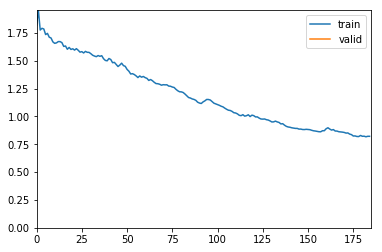

In [13]:
learn.fit_one_cycle(1,1e-2)

Unfreeze backbone of model, train for 10 epochs using cyclic learning rate scheme

epoch,train_loss,valid_loss,accuracy,time
0,0.653845,0.711636,0.764865,00:05
1,0.475038,2.402257,0.445946,00:05
2,0.399873,0.491134,0.862162,00:05
3,0.411133,0.270876,0.889189,00:05
4,0.354348,0.236181,0.898649,00:05
5,0.289009,0.249009,0.885135,00:05
6,0.235798,0.222594,0.897297,00:05
7,0.187123,0.179824,0.920270,00:05
8,0.188425,0.177820,0.914865,00:05
9,0.181709,0.178150,0.922973,00:05


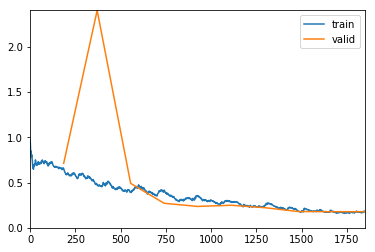

In [14]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-3,1e-2), pct_start=0.05)


In [15]:
learn.data = data_test
#learn.validate(data.test_dl)
interp = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Valid)
losses,idxs = interp.top_losses()


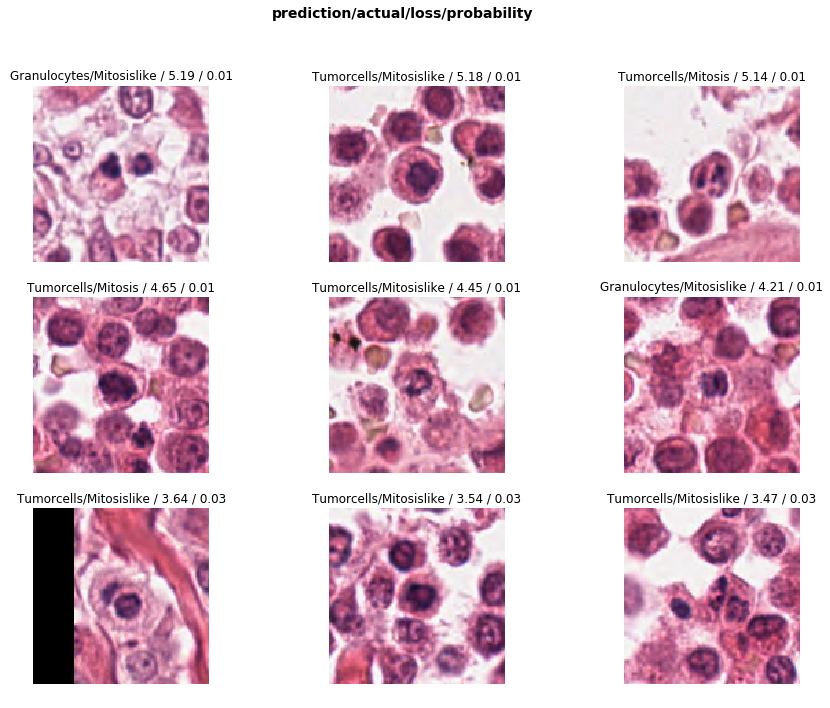

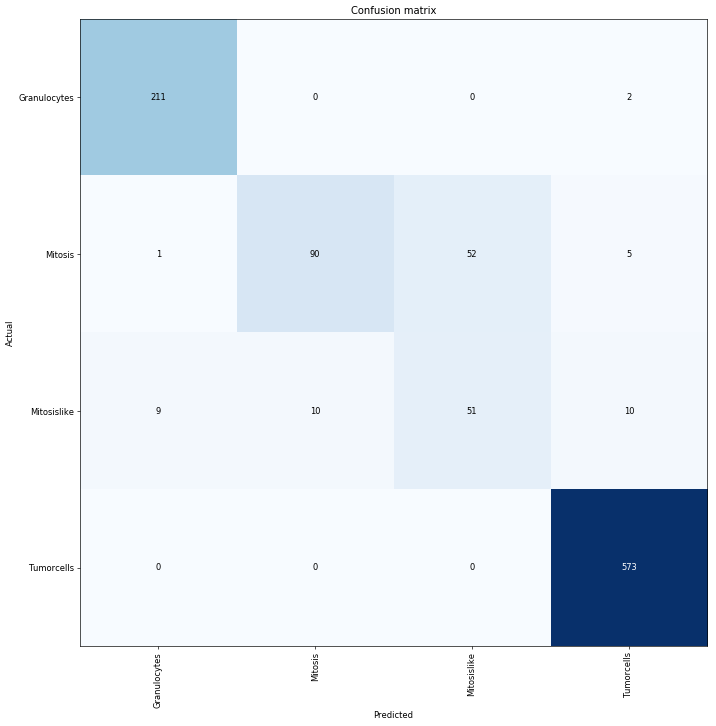

In [16]:
len(data.test_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [17]:
data_test

ImageDataBunch;

Train: LabelList (2689 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Tumorcells,Tumorcells,Tumorcells,Tumorcells,Tumorcells
Path: Data5HPF;

Valid: LabelList (1014 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Tumorcells,Tumorcells,Tumorcells,Tumorcells,Tumorcells
Path: Data5HPF;

Test: None

## Print confusion matrix, LaTeX style

In [18]:

print(" \\\\\n".join([" & ".join(map(str,line)) for line in interp.confusion_matrix()]))

211 & 0 & 0 & 2 \\
1 & 90 & 52 & 5 \\
9 & 10 & 51 & 10 \\
0 & 0 & 0 & 573


## Find out test accuracy

In [19]:
c = interp.confusion_matrix()
accuracy = np.sum(c*np.eye(4))/np.sum(c)
print('Test accuracy: ',accuracy)

Test accuracy:  0.9122287968441815


In [20]:
learn.save('CellClassifier_128px_5HPF.pth')
learn.export('CellClassifier_128px_5HPF.pth')